In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
#!pip install torchattacks
import torchattacks
import torch

In [2]:
#!pip install git+https://github.com/RobustBench/robustbench.git
import robustbench
from robustbench.utils import load_model,clean_accuracy
from robustbench.data import load_cifar10

# Load models and data

In [3]:
import os
#os.chdir('D:\\PFE black\\3.Robustbench and torchattacks')
os.getcwd()

'D:\\PFE black\\Transfer-attacks-comparison'

In [4]:
from cifar10_models.resnet import resnet50
my_model = resnet50(pretrained=True)
my_model.eval() 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
x_test, y_test = load_cifar10(n_examples=500)
n_examples = y_test.shape[0]

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


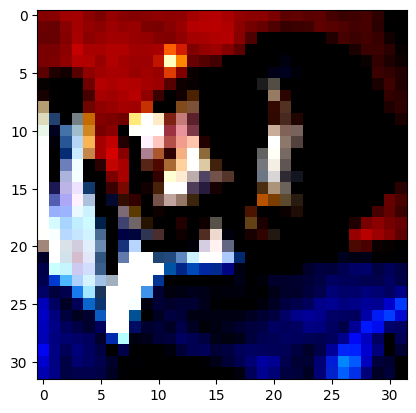

In [6]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Normalize(mean = [0.4914, 0.4822, 0.4465], std = [0.2471, 0.2435, 0.2616])
])
x_test = preprocess(x_test)
plt.imshow(x_test[0,:,:,:].permute(1, 2, 0) )

In [1]:
model_rank1 = load_model(model_name='Rebuffi2021Fixing_70_16_cutmix_extra', dataset='cifar10', threat_model='Linf')

In [8]:
model_rank2 = load_model(model_name='Gowal2021Improving_70_16_ddpm_100m', dataset='cifar10', threat_model='Linf')

In [9]:
model_rank3 = load_model(model_name='Gowal2020Uncovering_70_16_extra', dataset='cifar10', threat_model='Linf')

In [10]:
model_rank4 = load_model(model_name='Rebuffi2021Fixing_106_16_cutmix_ddpm', dataset='cifar10', threat_model='Linf')

In [11]:
model_rank5 = load_model(model_name='Rebuffi2021Fixing_70_16_cutmix_ddpm', dataset='cifar10', threat_model='Linf')

In [12]:
model_vanilla = load_model(model_name='Standard', dataset='cifar10', threat_model='Linf')

# torchattacks

### MI

In [13]:
MI_results = []

In [14]:
attack = torchattacks.MIFGSM(my_model, eps=8/255, steps=10, decay=1.0)
adv_images_MI = attack(x_test, y_test)

In [15]:
acc = clean_accuracy(model_rank1, adv_images_MI, y_test)
print('Robust Acc rank1: %2.2f %%'%(acc*100))
MI_results.append(acc)

Robust Acc rank1: 77.60 %


In [16]:
acc = clean_accuracy(model_rank2, adv_images_MI, y_test)
print('Robust Acc rank2: %2.2f %%'%(acc*100))
MI_results.append(acc)

Robust Acc rank2: 74.80 %


In [17]:
acc = clean_accuracy(model_rank3, adv_images_MI, y_test)
print('Robust Acc rank3: %2.2f %%'%(acc*100))
MI_results.append(acc)

Robust Acc rank3: 76.80 %


In [18]:
acc = clean_accuracy(model_rank4, adv_images_MI, y_test)
print('Robust Acc rank4: %2.2f %%'%(acc*100))
MI_results.append(acc)

Robust Acc rank4: 73.60 %


In [19]:
acc = clean_accuracy(model_rank5, adv_images_MI, y_test)
print('Robust Acc rank5: %2.2f %%'%(acc*100))
MI_results.append(acc)

Robust Acc rank5: 72.60 %


In [20]:
acc = clean_accuracy(model_vanilla, adv_images_MI, y_test)
print('Robust Acc vanilla: %2.2f %%'%(acc*100))
MI_results.append(acc)

Robust Acc vanilla: 45.80 %


### DI

In [21]:
DI_results = []

In [24]:
attack = torchattacks.DIFGSM(my_model, eps=8/255, alpha=2/255, steps=10, decay=0.0, resize_rate=0.9, diversity_prob=0.5, random_start=False)
adv_images_DI = attack(x_test, y_test)

In [25]:
acc = clean_accuracy(model_rank1, adv_images_DI, y_test)
print('Robust Acc rank1: %2.2f %%'%(acc*100))
DI_results.append(acc)

Robust Acc rank1: 77.20 %


In [26]:
acc = clean_accuracy(model_rank2, adv_images_DI, y_test)
print('Robust Acc rank2: %2.2f %%'%(acc*100))
DI_results.append(acc)

Robust Acc rank2: 75.20 %


In [27]:
acc = clean_accuracy(model_rank3, adv_images_DI, y_test)
print('Robust Acc rank3: %2.2f %%'%(acc*100))
DI_results.append(acc)

Robust Acc rank3: 76.60 %


In [28]:
acc = clean_accuracy(model_rank4, adv_images_DI, y_test)
print('Robust Acc rank4: %2.2f %%'%(acc*100))
DI_results.append(acc)

Robust Acc rank4: 73.40 %


In [29]:
acc = clean_accuracy(model_rank5, adv_images_DI, y_test)
print('Robust Acc rank5: %2.2f %%'%(acc*100))
DI_results.append(acc)

Robust Acc rank5: 73.00 %


In [30]:
acc = clean_accuracy(model_vanilla, adv_images_DI, y_test)
print('Robust Acc vanilla: %2.2f %%'%(acc*100))
DI_results.append(acc)

Robust Acc vanilla: 45.60 %


In [31]:
MI_results

[0.776, 0.748, 0.768, 0.736, 0.726, 0.458]

In [32]:
DI_results

[0.772, 0.752, 0.766, 0.734, 0.73, 0.456]